In [1]:
import warnings
import plotly.express as px
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
import pandas as pd 
import statsmodels.api as sm
import matplotlib 
from pylab import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 18,8
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

In [2]:
data = pd.read_csv('datasetGDPforTimeseries.csv')
data

,Year,GDP growth (annual %)
0,01/01/1960,2.632
1,01/01/1961,6.058
2,01/01/1962,5.453
3,01/01/1963,-0.456
4,01/01/1964,10.953
...,...,...
57,01/01/2017,7.284
58,01/01/2018,7.864
59,01/01/2019,8.153
60,01/01/2020,5.200


In [3]:
data.describe()

,GDP growth (annual %)
count,62.000000
mean,4.363000
std,3.707718
min,-13.974000
25%,3.377750
50%,5.099000
75%,6.363250
max,10.953000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   62 non-null     object 
 1   GDP growth (annual %)  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [5]:
data['Year'] = pd.to_datetime(data['Year'], infer_datetime_format=True)
data_s = data.set_index(['Year'])
data_s

,GDP growth (annual %)
Year,
1960-01-01,2.632
1961-01-01,6.058
1962-01-01,5.453
1963-01-01,-0.456
1964-01-01,10.953
...,...
2017-01-01,7.284
2018-01-01,7.864
2019-01-01,8.153


In [6]:
data_s.sort_values('Year')

,GDP growth (annual %)
Year,
1960-01-01,2.632
1961-01-01,6.058
1962-01-01,5.453
1963-01-01,-0.456
1964-01-01,10.953
...,...
2017-01-01,7.284
2018-01-01,7.864
2019-01-01,8.153


<AxesSubplot:xlabel='Year'>

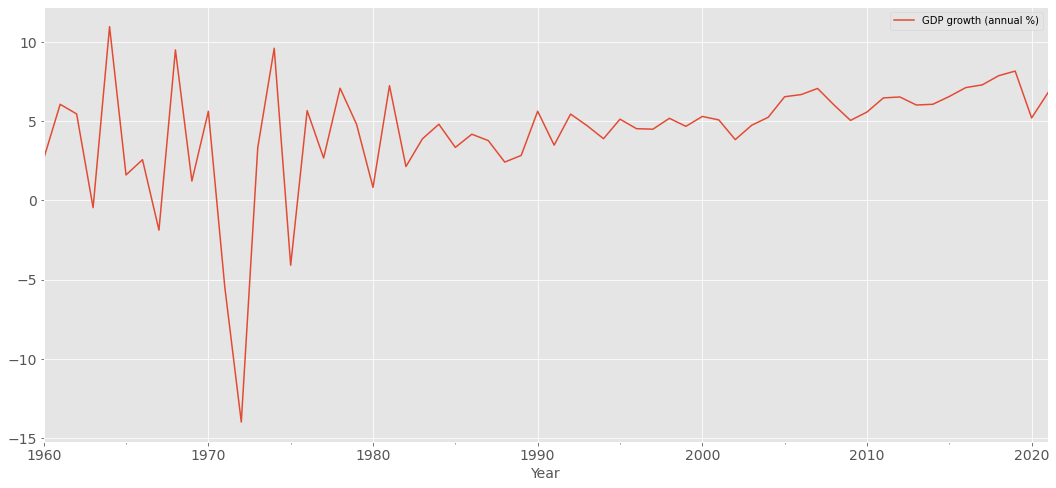

In [7]:
data_s.plot()

In [8]:
data_s.shape

(62, 1)

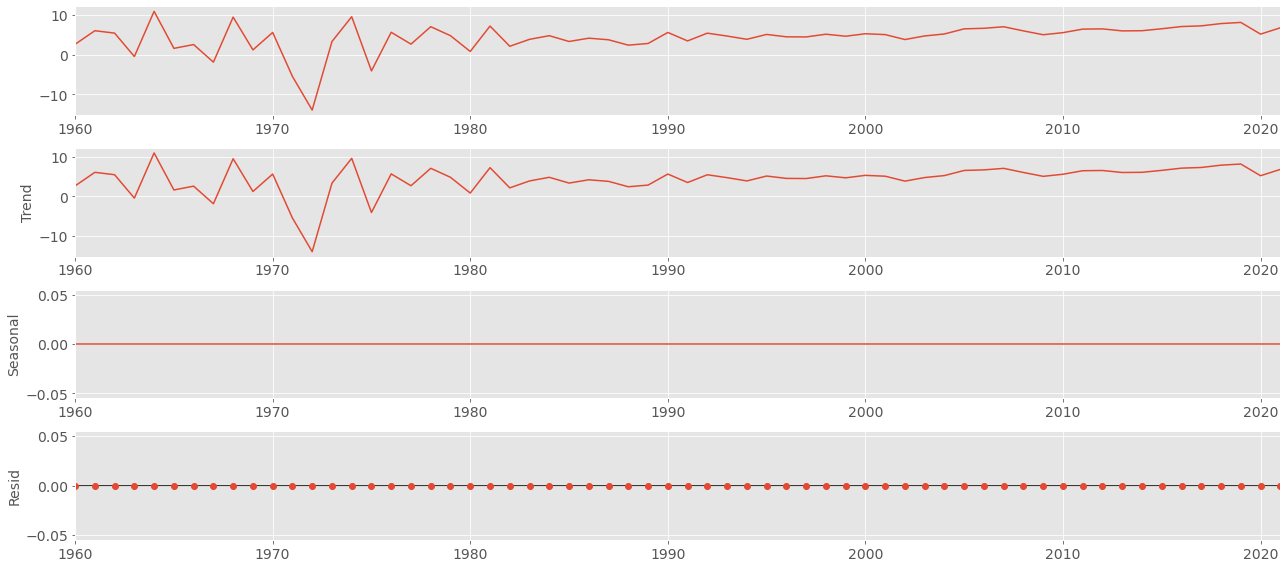

In [9]:
decomposition = sm.tsa.seasonal_decompose(data_s, model = 'additive')
fig = decomposition.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    dftest = adfuller(data, autolag = 'AIC')
    print('1. ADF: ', dftest[0])
    print('2. P-value: ', dftest[1])
    print('3. Number of lags: ', dftest[2])
    print('4. Nnumer of Observations for ADF regression & critical values calculation: ', dftest[3])
    print('5. Critical values: ')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [11]:
adf_test(data_s['GDP growth (annual %)'])

1. ADF:  -1.8700076025395864
2. P-value:  0.3462993111011345
3. Number of lags:  4
4. Nnumer of Observations for ADF regression & critical values calculation:  57
5. Critical values: 
	 1% :  -3.5506699942762414
	 5% :  -2.913766394626147
	 10% :  -2.5946240473991997


Here P-value is 0.36 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

Let’s try to see the first difference and seasonal difference:

In [12]:
data_s['GDP growth rate First Difference'] = data_s['GDP growth (annual %)'] - data_s['GDP growth (annual %)'].shift(1)
data_s['GDP growth rate Seasonal First Difference']=data_s['GDP growth (annual %)'] - data_s['GDP growth (annual %)'].shift(5)
data_s.head(20)

,GDP growth (annual %),GDP growth rate First Difference,GDP growth rate Seasonal First Difference
Year,,,
1960-01-01,2.632,NaN,NaN
1961-01-01,6.058,3.426,NaN
1962-01-01,5.453,-0.605,NaN
1963-01-01,-0.456,-5.909,NaN
1964-01-01,10.953,11.409,NaN
1965-01-01,1.606,-9.347,-1.026
1966-01-01,2.567,0.961,-3.491
1967-01-01,-1.876,-4.443,-7.329
1968-01-01,9.489,11.365,9.945


In [13]:
adf_test(data_s['GDP growth rate Seasonal First Difference'].dropna())

1. ADF:  -4.826500907510875
2. P-value:  4.838071452558091e-05
3. Number of lags:  11
4. Nnumer of Observations for ADF regression & critical values calculation:  45
5. Critical values: 
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937


<AxesSubplot:xlabel='Year'>

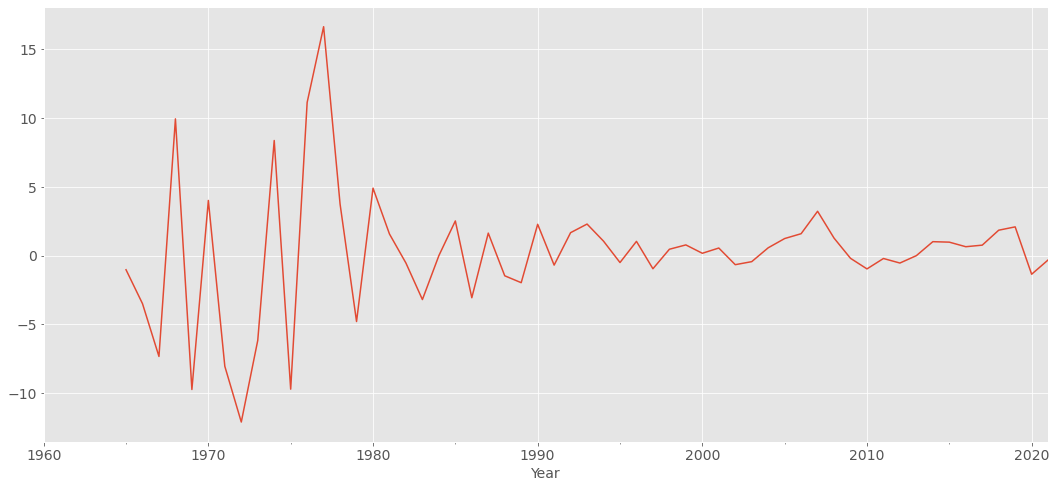

In [14]:
data_s['GDP growth rate Seasonal First Difference'].plot()

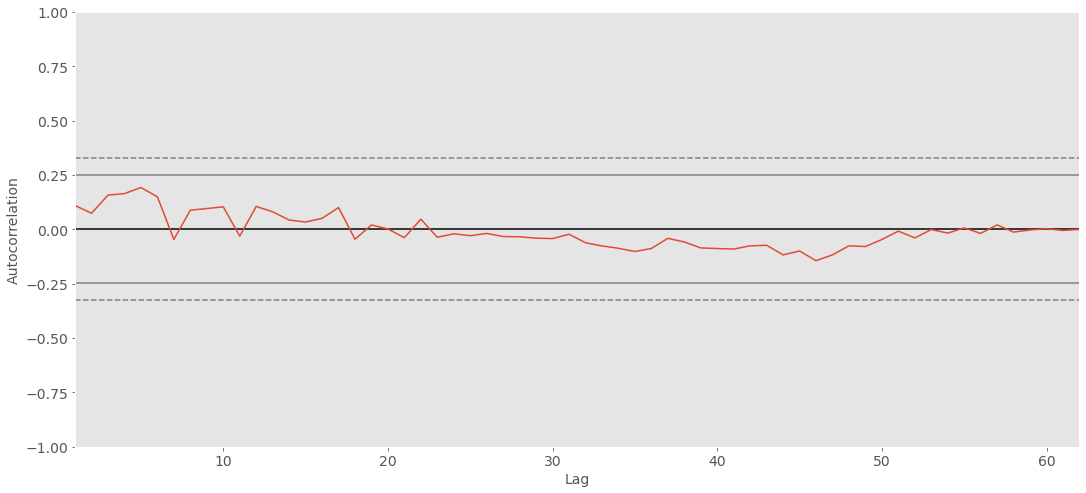

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_s['GDP growth (annual %)'])
plt.show()

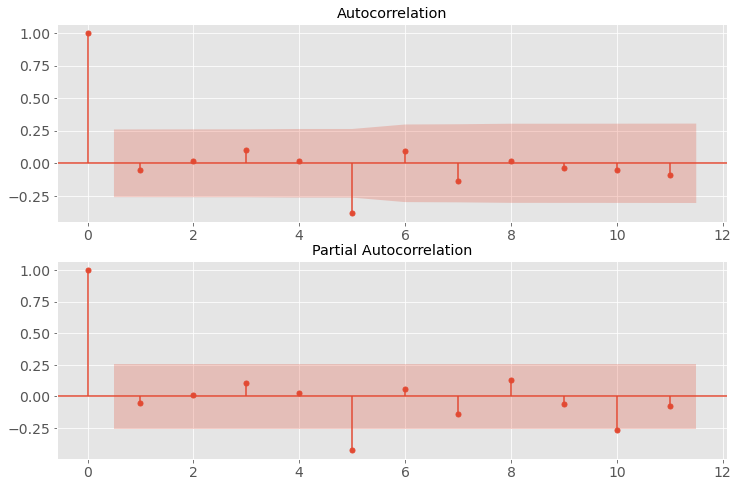

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211) #top left
fig = sm.graphics.tsa.plot_acf(data_s['GDP growth rate Seasonal First Difference'].dropna(),lags=11,ax=ax1)
ax2 = fig.add_subplot(212) ##top right
fig = sm.graphics.tsa.plot_pacf(data_s['GDP growth rate Seasonal First Difference'].dropna(),lags=11,ax=ax2)

## Order For ARIMA model

In [17]:
from pmdarima import auto_arima
data_fit = auto_arima(data_s['GDP growth (annual %)'], trace = True, suppress_warnings = True)
data_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=371.792, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=358.185, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=369.803, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=350.347, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=346.948, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=344.615, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=344.673, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=342.707, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=345.013, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=342.814, Time=0.06 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -165.375
Date:                Tue, 13 Jul 2021   AIC                            334.750
Time:                        16:48:31   BIC                            338.972
Sample:                             0   HQIC                           336.405
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8913      0.075    -11.874      0.000      -1.038      -0.744
sigma2        12.9143      1.137     11.360      0.000      10.686      15.142
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               188.41
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            -1.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Apply ARIMA model

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
print(data_s.shape)

(62, 3)


In [21]:
train_data = data_s.iloc[:-20]
test_data = data_s.iloc[-20:]
print(train_data.shape, test_data.shape)

(42, 3) (20, 3)


In [22]:
model=ARIMA(train_data['GDP growth (annual %)'],order=(0,1,1))
model_fit=model.fit()
model_fit.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.GDP growth (annual %)   No. Observations:                   41
Model:                      ARIMA(0, 1, 1)   Log Likelihood                -117.924
Method:                            css-mle   S.D. of innovations              4.103
Date:                     Wed, 14 Jul 2021   AIC                            241.848
Time:                             21:22:52   BIC                            246.989
Sample:                         01-01-1961   HQIC                           243.720
                              - 01-01-2001                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0610      0.052      1.168      0.243      -0.041       0.163
ma.L1.D.GDP growth (annual %)    -1.0000      0.074    -13.478      0.000      -1.145      -0.855
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Year'>

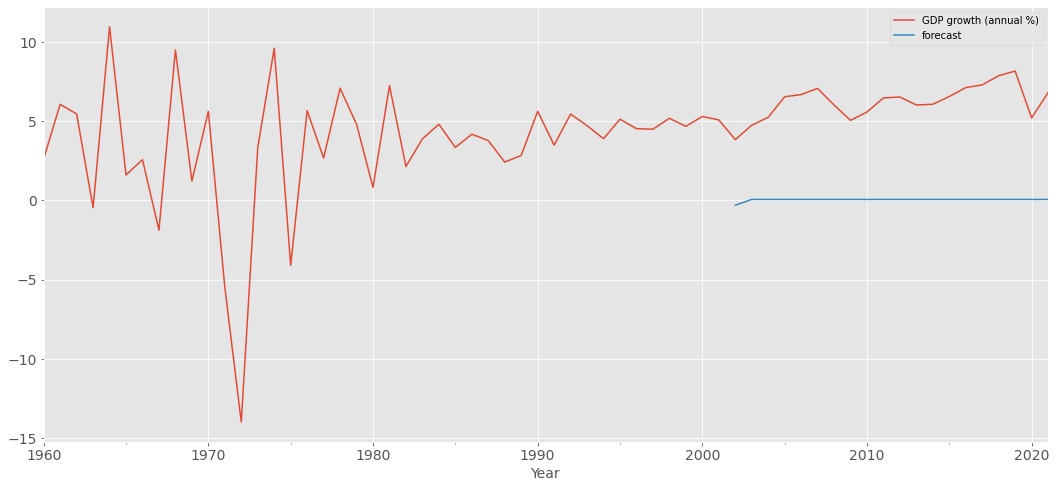

In [24]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

data_s['forecast']=model_fit.predict(start=start,end=end,dynamic=True)
data_s[['GDP growth (annual %)','forecast']].plot()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Year'>

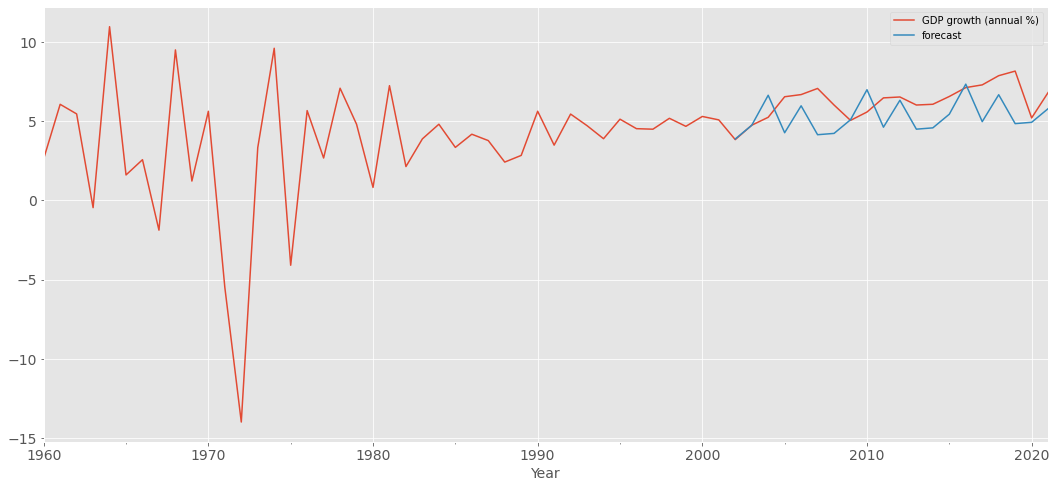

In [51]:
model=sm.tsa.statespace.SARIMAX(data_s['GDP growth (annual %)'],order=(0, 1, 1),seasonal_order=(0,1,1,6))
results=model.fit()
data_s['forecast']=results.predict(start=start,end=end,dynamic=True)
data_s[['GDP growth (annual %)','forecast']].plot()

In [52]:
new_bd = data_s[['GDP growth (annual %)','forecast']]

In [53]:
data_for_rmse = new_bd[-20:]

In [54]:
data_for_rmse

,GDP growth (annual %),forecast
Year,,
2002-01-01,3.833,3.874690
2003-01-01,4.740,4.734606
2004-01-01,5.240,6.629274
2005-01-01,6.536,4.266822
2006-01-01,6.672,5.964684
2007-01-01,7.059,4.141526
2008-01-01,6.014,4.224476
2009-01-01,5.045,5.084393
2010-01-01,5.572,6.979061


In [55]:
from sklearn.metrics import mean_squared_error
import math

In [56]:
mse = mean_squared_error(data_for_rmse['GDP growth (annual %)'], data_for_rmse['forecast'])
rmse = math.sqrt(mse)

In [57]:
rmse

1.572377384998709

In [58]:
data_for_r_squre = data_for_rmse[['GDP growth (annual %)','forecast']]
data_for_r_squre

,GDP growth (annual %),forecast
Year,,
2002-01-01,3.833,3.874690
2003-01-01,4.740,4.734606
2004-01-01,5.240,6.629274
2005-01-01,6.536,4.266822
2006-01-01,6.672,5.964684
2007-01-01,7.059,4.141526
2008-01-01,6.014,4.224476
2009-01-01,5.045,5.084393
2010-01-01,5.572,6.979061


In [59]:
from sklearn.metrics import r2_score
R_square = r2_score(data_for_r_squre['GDP growth (annual %)'], data_for_r_squre['forecast']) 
print(R_square) 

-1.2715418328914017


<AxesSubplot:xlabel='Year'>

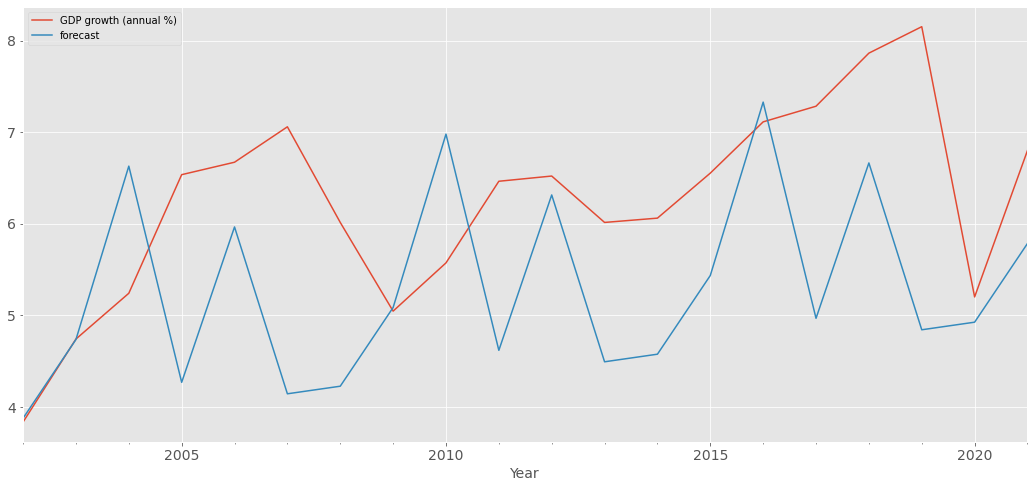

In [60]:
data_for_r_squre[['GDP growth (annual %)','forecast']].plot()

<AxesSubplot:>

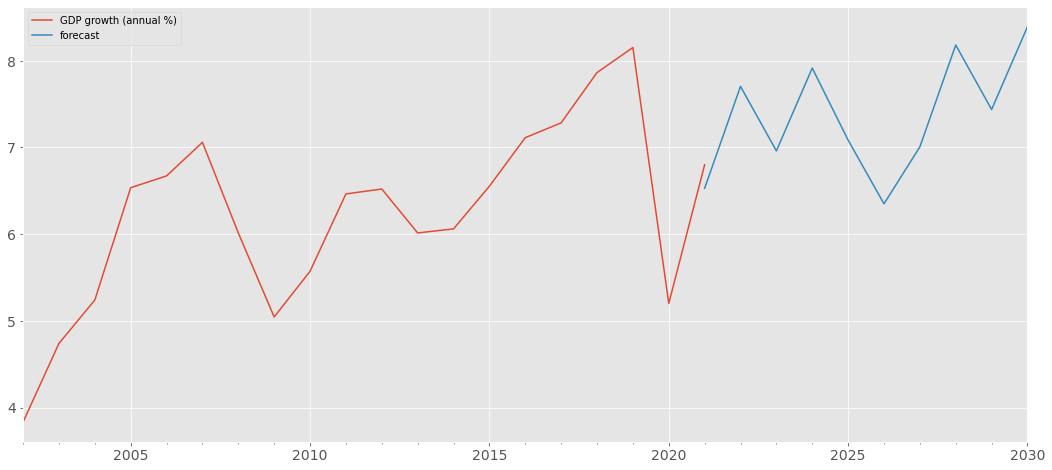

In [61]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_for_rmse.index[-1]+ DateOffset(years=x)for x in range(0,10)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_for_rmse.columns)
future_df=pd.concat([data_for_rmse,future_datest_df])
future_df['forecast'] = results.predict(start = 61, end = 81, dynamic= True)
future_df[['GDP growth (annual %)', 'forecast']].plot()

In [62]:
future_df[['GDP growth (annual %)', 'forecast']].tail(10)

,GDP growth (annual %),forecast
2021-01-01,6.8,6.529287
2022-01-01,NaN,7.704471
2023-01-01,NaN,6.960093
2024-01-01,NaN,7.915770
2025-01-01,NaN,7.085044
2026-01-01,NaN,6.349997
2027-01-01,NaN,7.006526
2028-01-01,NaN,8.181710
2029-01-01,NaN,7.437332
2030-01-01,NaN,8.393009


In [63]:
errors = abs(data_for_rmse['GDP growth (annual %)'] - data_for_rmse['forecast'])
mape = 100 * (errors / data_for_rmse['GDP growth (annual %)'])
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.01 %.
